<a href="https://colab.research.google.com/github/Ritvik-Girish/SpeechEmotionRecognition/blob/main/EmotionRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# AUDIO EMOTION RECOGNITION
import pandas as pd
import numpy as np

import os
import sys

!pip install --upgrade librosa
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

from google.colab import drive
drive.mount('/content/drive')
Ravdess = '/content/drive/MyDrive/DataSets/audio_speech_actors_01-24/'
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Emotions                                               Path
0  neutral  /content/drive/MyDrive/DataSets/audio_speech_a...
1     calm  /content/drive/MyDrive/DataSets/audio_speech_a...
2     calm  /content/drive/MyDrive/DataSets/audio_speech_a...
3  neutral  /content/drive/MyDrive/DataSets/audio_speech_a...
4    happy  /content/drive/MyDrive/DataSets/audio_speech_a...

In [ ]:
data_path = pd.concat([Ravdess_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                               Path
0  neutral  /content/drive/MyDrive/DataSets/audio_speech_a...
1     calm  /content/drive/MyDrive/DataSets/audio_speech_a...
2     calm  /content/drive/MyDrive/DataSets/audio_speech_a...
3  neutral  /content/drive/MyDrive/DataSets/audio_speech_a...
4    happy  /content/drive/MyDrive/DataSets/audio_speech_a...

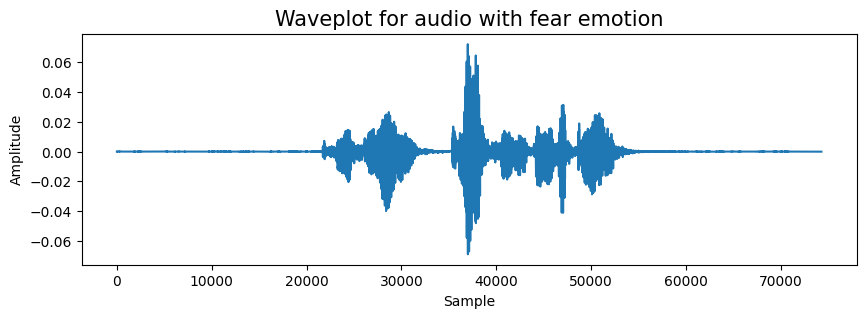

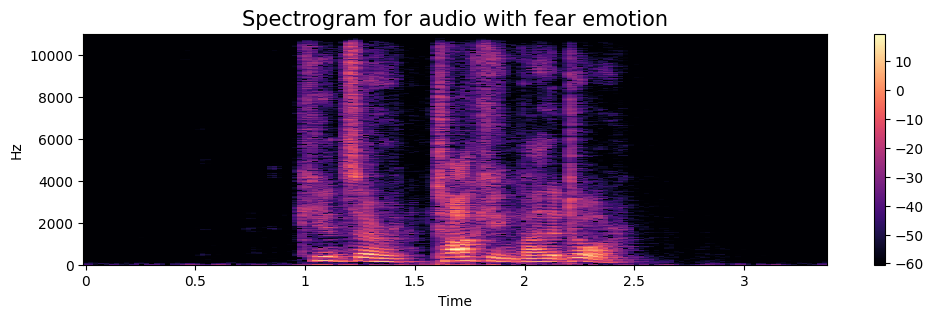

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    plt.plot(data)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.show()

def create_spectrogram(data, sr, e):
    # Compute the spectrogram
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.show()


emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


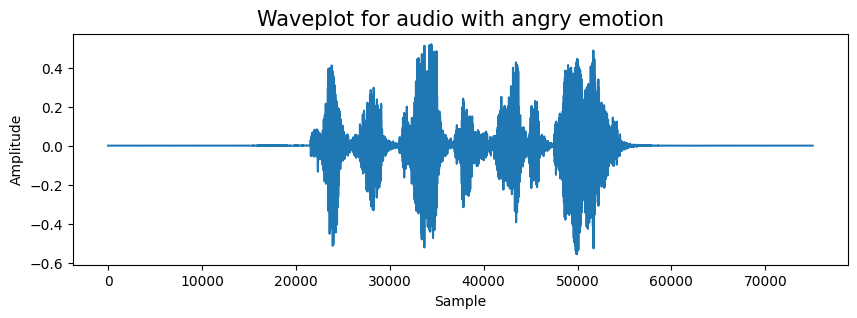

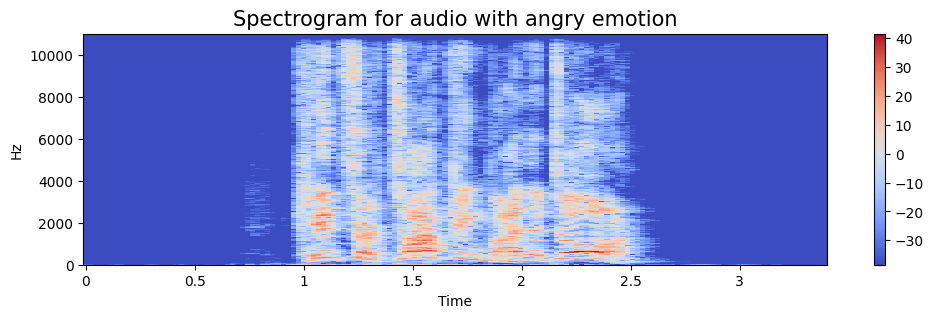

In [ ]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

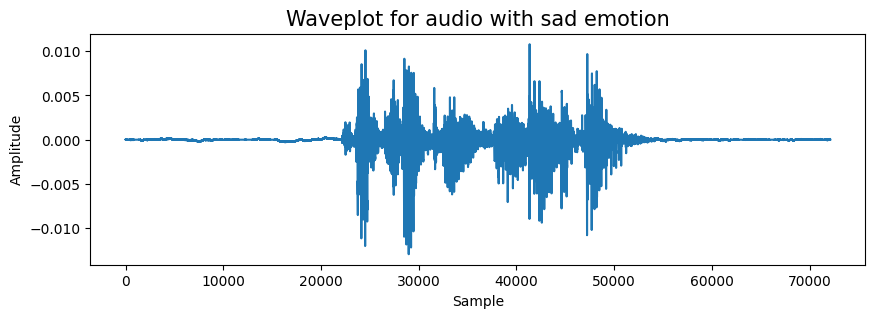

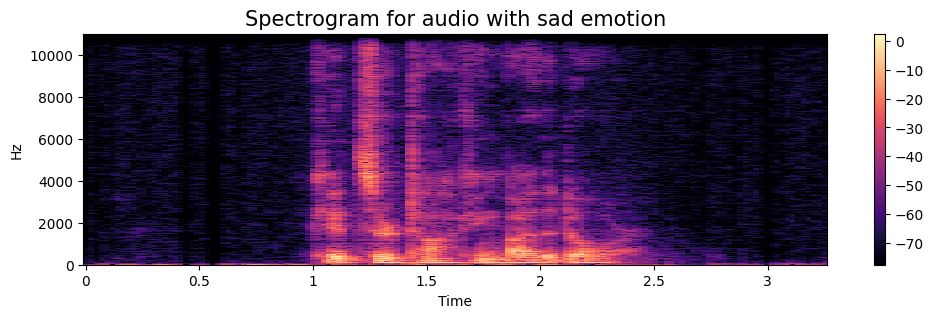

In [ ]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

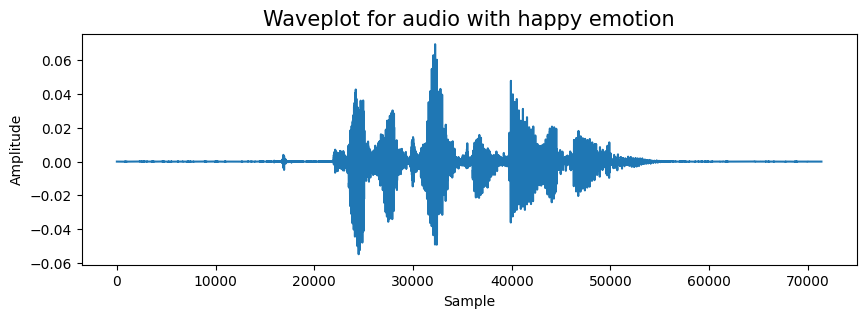

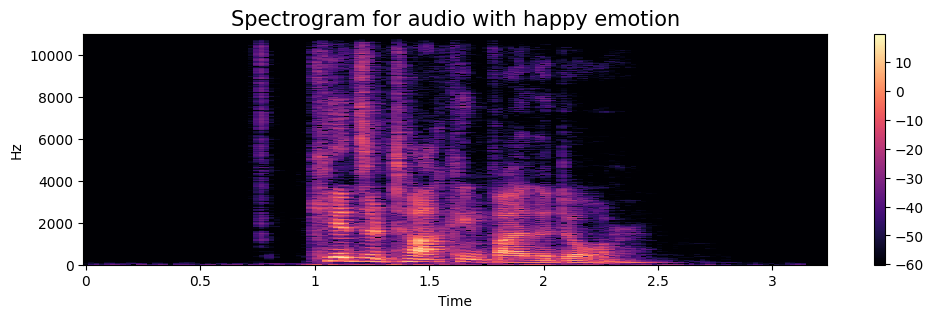

In [ ]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
#to enhance the audio 1)Adding Noise
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

#to enhance the audio 2)Increasing the time
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

#to enhance the audio 3)Shifting the audio
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

#to enhance the audio 4)Increasing the pitch
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)


# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

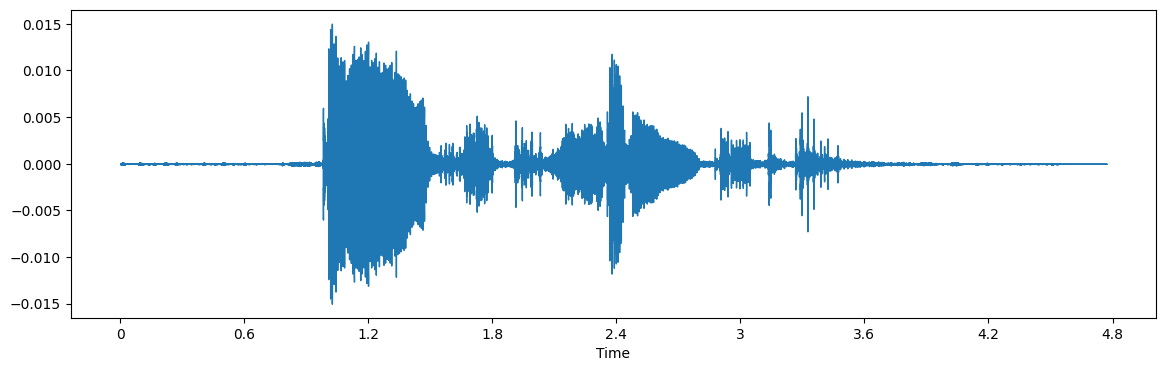

In [ ]:
#REGULAR AUDIO WITHOUT ANY ENHANCEMENT
plt.figure(figsize=(14,4))
librosa.display.waveshow(data, sr=sample_rate)
Audio(path)

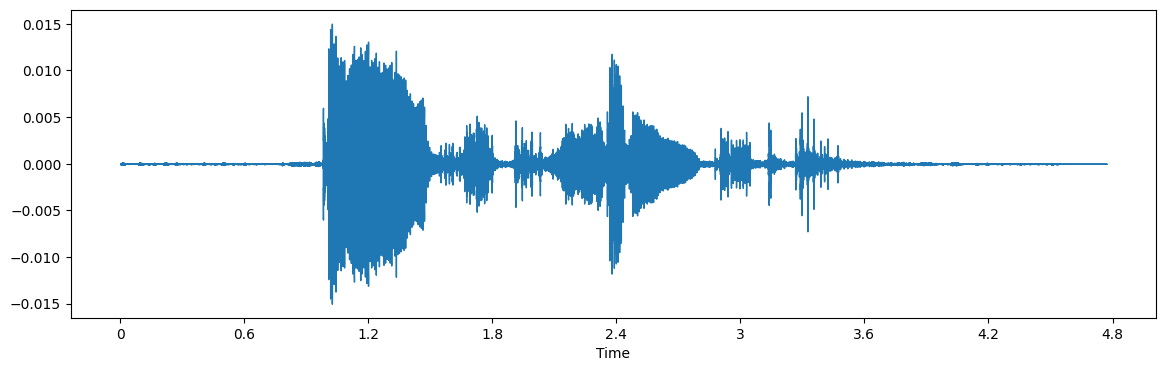

In [ ]:
#STEP-1 : injecting noise (THIS IS USED TO ENHANCE AUDIO AND PREVENT OVERFITTING)
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(data, sr=sample_rate)
Audio(x, rate=sample_rate)

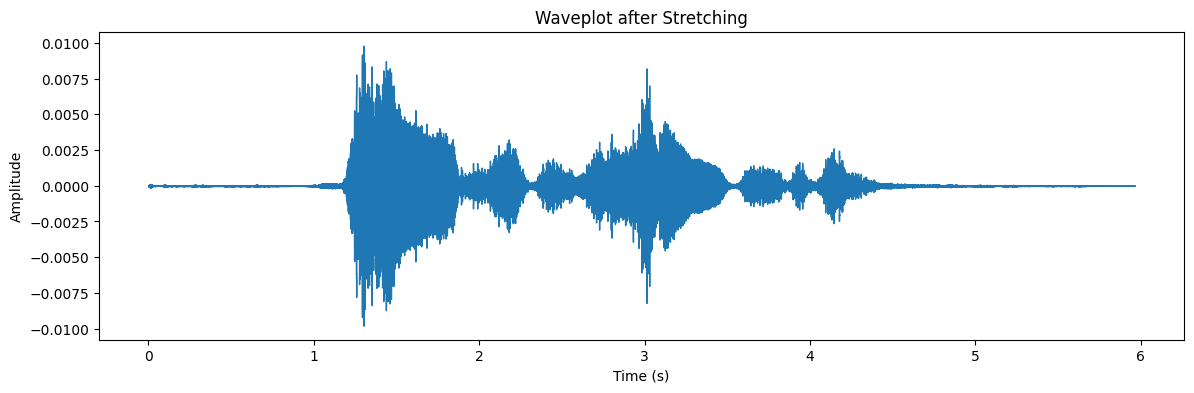

In [ ]:
#STEP-2 : stretching the audio (THIS IS USED FOR DATA AUGMENTATION)
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title('Waveplot after Stretching')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

Audio(x, rate=sample_rate)


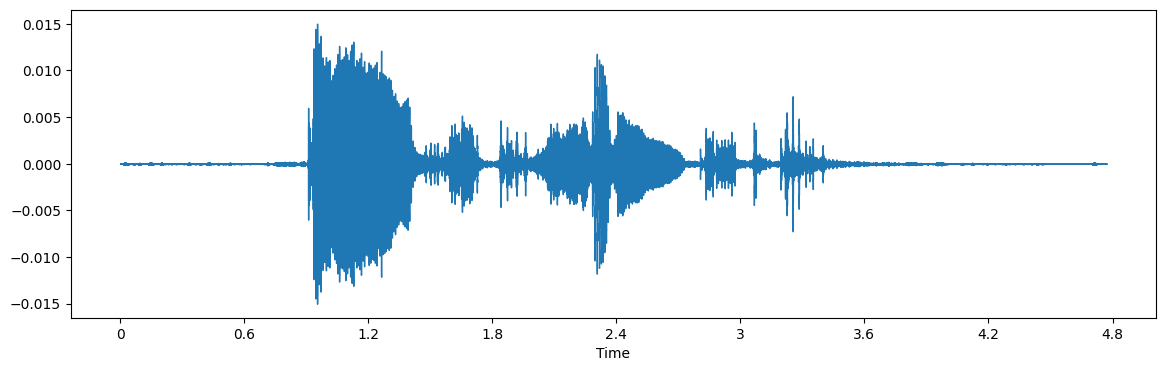

In [ ]:
#STEP-3 : shifting the audio (THIS IS USED TO MAINTAIN THE DATA IN THE PROPER TIME LINE)
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

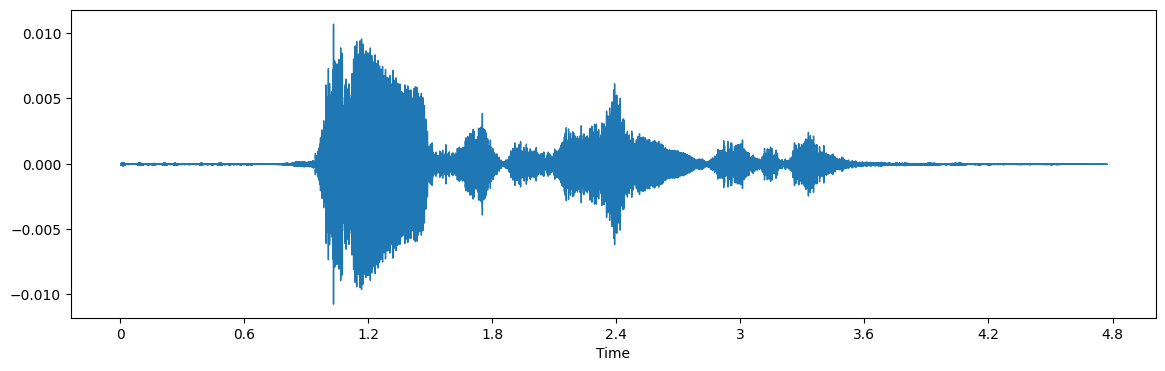

In [ ]:
#STEP-4 : adjusting the pitch of the audio (THIS IS USED TO ENHANCE THE DATA)
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [ ]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [ ]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [ ]:
len(X), len(Y), data_path.Path.shape

(4320, 4320, (1440,))

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.253979  0.627316  0.656202  0.713617  0.704637  0.645518  0.642079   
1  0.320719  0.758597  0.756124  0.780545  0.787237  0.771701  0.700183   
2  0.141193  0.611344  0.599181  0.682876  0.697426  0.665446  0.643398   
3  0.178354  0.810467  0.707073  0.600535  0.604771  0.648012  0.626874   
4  0.216743  0.826615  0.742097  0.651067  0.654193  0.711810  0.688892   

          7         8         9  ...       153       154       155       156  \
0  0.656874  0.701639  0.734349  ...  0.000013  0.000018  0.000025  0.000030   
1  0.659030  0.696769  0.724353  ...  0.000043  0.000049  0.000056  0.000062   
2  0.657416  0.668088  0.715166  ...  0.000003  0.000002  0.000002  0.000004   
3  0.597224  0.663339  0.611452  ...  0.000007  0.000007  0.000005  0.000006   
4  0.638753  0.704059  0.656365  ...  0.000008  0.000008  0.000007  0.000007   

        157       158       159           160           161   labels  
0  0.000013  0.000008  0.000007  3.718574e-06  3.400223e-07  neutral  
1  0.000041  0.000040  0.000037  3.417984e-05  3.032757e-05  neutral  
2  0.000009  0.000004  0.000002  8.562805e-07  5.902780e-08  neutral  
3  0.000004  0.000004  0.000002  8.899194e-07  5.797154e-08     calm  
4  0.000006  0.000005  0.000004  2.107723e-06  1.286310e-06     calm  

[5 rows x 163 columns]

In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162), (3240, 8), (1080, 162), (1080, 8))

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162), (3240, 8), (1080, 162), (1080, 8))

In [ ]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162, 1), (3240, 8), (1080, 162, 1), (1080, 8))

In [ ]:
#BUILDING MACHINE LEARNING MODEL
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 162, 256)          1536      
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 81, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_9 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 41, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_10 (Conv1D)          (None, 41, 128)           163968    
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 21, 128)          

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
51/51 [==============================] - 24s 434ms/step - loss: 1.9766 - accuracy: 0.2102 - val_loss: 1.9236 - val_accuracy: 0.2111 - lr: 0.0010
Epoch 2/50
51/51 [==============================] - 21s 410ms/step - loss: 1.9122 - accuracy: 0.2299 - val_loss: 1.8822 - val_accuracy: 0.2194 - lr: 0.0010
Epoch 3/50
51/51 [==============================] - 24s 467ms/step - loss: 1.8495 - accuracy: 0.2608 - val_loss: 1.8036 - val_accuracy: 0.3148 - lr: 0.0010
Epoch 4/50
51/51 [==============================] - 22s 431ms/step - loss: 1.8136 - accuracy: 0.2852 - val_loss: 1.7382 - val_accuracy: 0.3111 - lr: 0.0010
Epoch 5/50
51/51 [==============================] - 23s 451ms/step - loss: 1.7551 - accuracy: 0.3222 - val_loss: 1.7280 - val_accuracy: 0.3537 - lr: 0.0010
Epoch 6/50
51/51 [==============================] - 21s 421ms/step - loss: 1.7329 - accuracy: 0.3336 - val_loss: 1.7196 - val_accuracy: 0.3630 - lr: 0.0010
Epoch 7/50
51/51 [==============================] - 23s 450ms/st

34/34 [==============================] - 2s 47ms/step - loss: 1.3746 - accuracy: 0.6546
Accuracy of our model on test data :  80.4629647731781 %


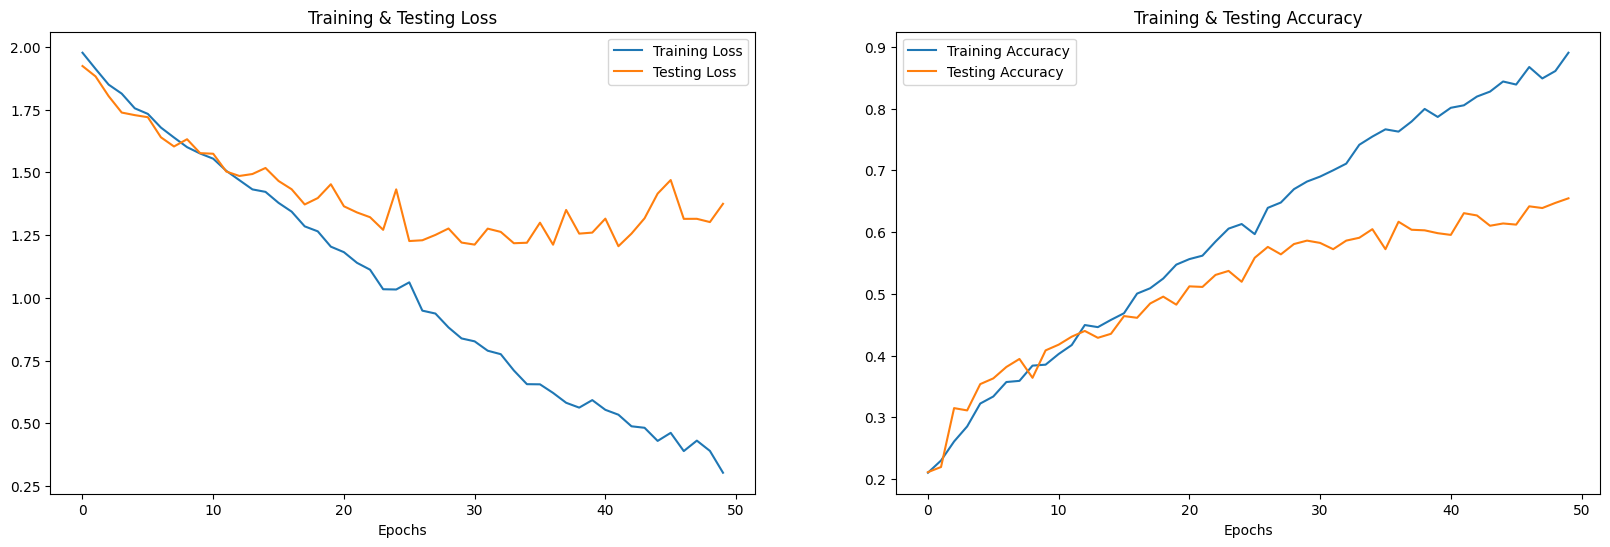

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

34/34 [==============================] - 3s 76ms/step


Predicted Labels Actual Labels
0         surprise      surprise
1          disgust         angry
2              sad           sad
3             calm          calm
4             calm           sad
5              sad         happy
6              sad           sad
7             calm          calm
8         surprise      surprise
9             calm          calm

Saving Recording_Happy.m4a to Recording_Happy (2).m4a
Processing Recording_Happy (2).m4a...


<ipython-input-79-8a8e20295f64>:7: UserWarning: PySoundFile failed. Trying audioread instead.
  data, sampling_rate = librosa.load(upload_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


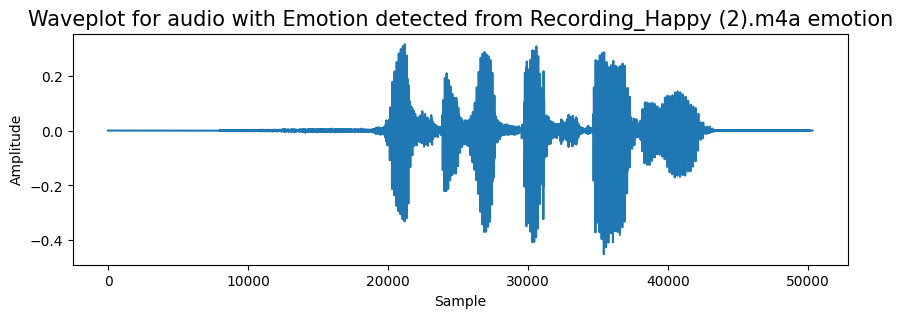

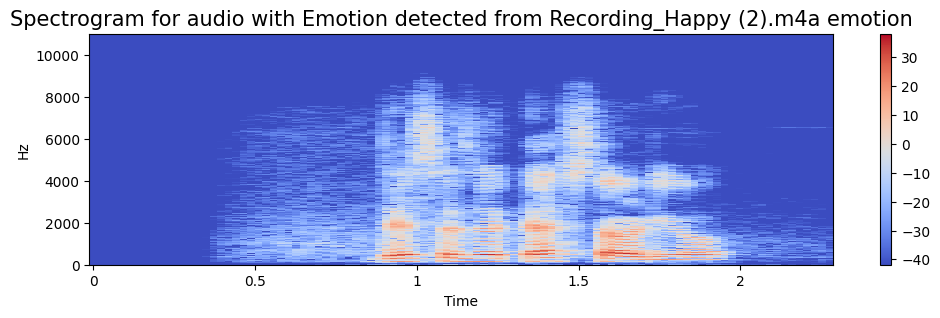

<ipython-input-66-6f671650d433>:28: UserWarning: PySoundFile failed. Trying audioread instead.
  data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


1/1 [==============================] - 0s 38ms/step
Emotion detected from Recording_Happy (2).m4a: ['happy']


In [ ]:
# Add import statement for files from google.colab
from google.colab import files

# Function to detect emotion and print spectrograms
def detect_emotion_and_print_spectrograms(upload_path):
    # Load the uploaded audio file
    data, sampling_rate = librosa.load(upload_path)

    # Extract filename from path
    filename = upload_path.split('/')[-1]

    # Display waveplot
    create_waveplot(data, sampling_rate, f'Emotion detected from {filename}')

    # Display spectrogram
    create_spectrogram(data, sampling_rate, f'Emotion detected from {filename}')

    # Perform emotion detection
    features = get_features(upload_path)
    features_scaled = scaler.transform(features)
    features_scaled = np.expand_dims(features_scaled, axis=2)
    prediction = model.predict(features_scaled)

    # Decode predicted emotion
    predicted_emotion = encoder.inverse_transform(prediction)

    # Print detected emotion
    print(f'Emotion detected from {filename}: {predicted_emotion[0]}')

# Allow users to upload audio files
uploaded = files.upload()

# Process uploaded audio files
for filename in uploaded.keys():
    print(f'Processing {filename}...')
    detect_emotion_and_print_spectrograms(filename)

